In [2]:
import pymde
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from my_knn_module.import_data import import_genome_data_as_df
from sklearn.metrics import ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'pymde'

In [2]:
real_df = import_genome_data_as_df()
real_df.head()

In [3]:
X = real_df.iloc[:, 3:10002]
y = np.ravel(real_df.iloc[:, 10002:10003])

X = X.to_numpy()

In [4]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [5]:
mde = pymde.preserve_neighbors(data=X, embedding_dim=2, verbose=True)
embedding = mde.embed()

Oct 20 03:51:19 PM: Computing 15-nearest neighbors, with max_distance=None
Oct 20 03:51:26 PM: Exact nearest neighbors by brute force 
Oct 20 03:51:36 PM: Computing quadratic initialization.


<AxesSubplot:>

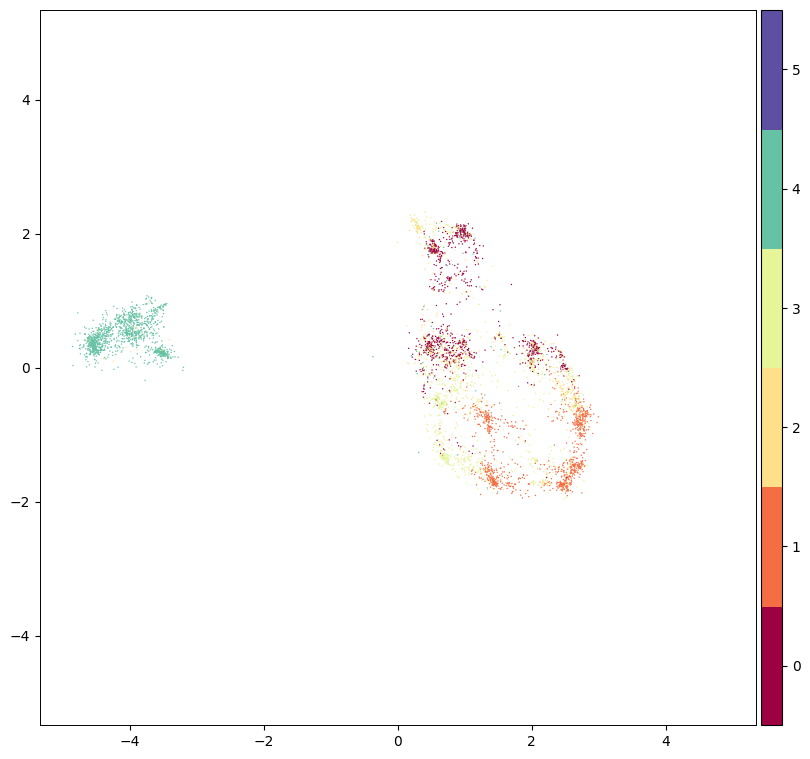

In [6]:
pymde.plot(embedding, color_by=y)

In [7]:
print(mde)
print(embedding)

MDE problem:
	n (number of items) 5008
	m (embedding dimension) 2
	p (number of edges) 112757
	fraction of total edges 9.0e-03
	PushAndPull distortion functions
	constraint centered
	device cpu
tensor([[ 0.6030,  0.4431],
        [ 2.4353,  0.0094],
        [ 0.5554,  1.7959],
        ...,
        [ 0.7959,  2.0471],
        [ 0.9706, -0.4608],
        [ 1.0652, -1.5199]])


In [8]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
NUMBER_OF_NEIGHBORS = 6
MODEL = KNeighborsClassifier

In [10]:
X = embedding.numpy()

In [11]:
knn_model = MODEL(n_neighbors = NUMBER_OF_NEIGHBORS)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [12]:
train_preds = knn_model.predict(X)
mse = mean_squared_error(y, train_preds)
rmse = sqrt(mse)
print("The mean squared error for our model is: ", rmse)

The mean squared error for our model is:  1.0118112377467798


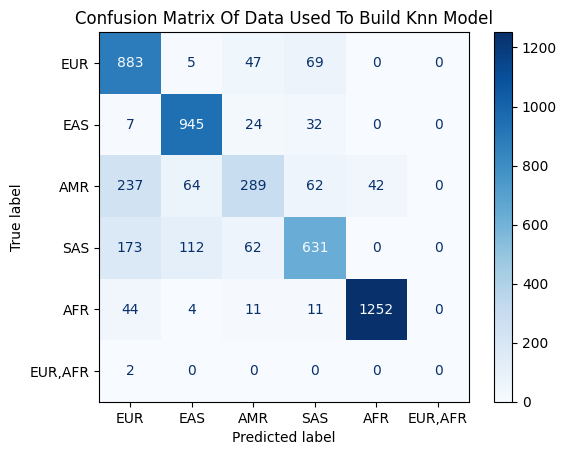

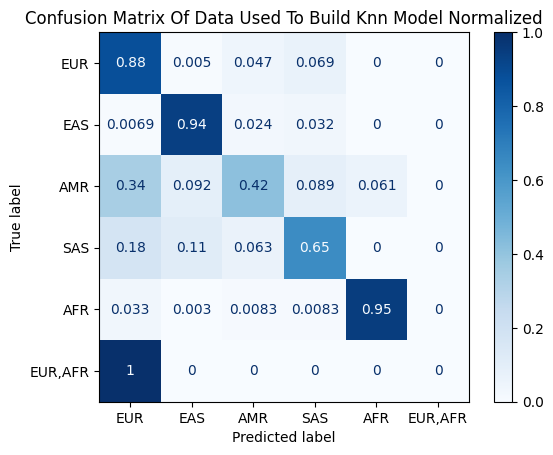

In [13]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model Normalized")

plt.show()

In [14]:
print(knn_model.score(X, y))

0.7987220447284346


t-SNE
uMap